In [30]:
%matplotlib ipympl
import logging
import math, sys
import seaborn as sns
from platform import python_version
import matplotlib.pyplot as plt
from pexpect.replwrap import python

from ipywidgets import interact

from src.main.GSHM import gshm_delta

sns.set_theme(font_scale=1.5, rc={'text.usetex' : True})
from src.main.util.logging_utils import init_logger

logger = init_logger(logging.INFO)
if python_version() <= "3.10":
    logger.warning("This script has only been tested on python 3.9. Detected: {}".format(python_version()))

import numpy as np
import matplotlib.pyplot as plt

[array([9.97212261e-06, 9.97212261e-06, 9.97212261e-06, ...,
       9.97212261e-06, 9.97212261e-06, 9.97212261e-06]), array([1.00310385e-05, 1.00298485e-05, 1.00286587e-05, ...,
       9.97154635e-06, 9.97173844e-06, 9.97193053e-06]), array([1.00310385e-05, 1.00296566e-05, 1.00282748e-05, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])]


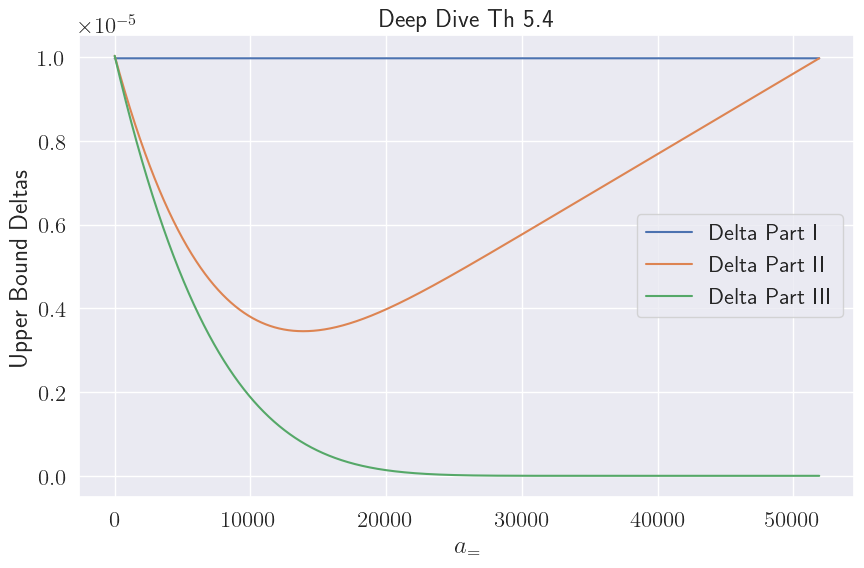

In [28]:
c_u = 51914 # numURLs Contributed
sigma = 2228
tau_diff = 13948
epsilon = 0.349
all_deltas = gshm_delta(c_u, sigma, tau_diff, epsilon)
print(all_deltas)
# Figure A: Plotting delta for parameters in paper:
#  c_u 51914, sigma 2228, tau_diff = 16176, epsilon = 0.4

plt.figure(figsize=(10, 6))
x_values = range(1, c_u + 1)

plt.plot(x_values, all_deltas[0], label=f'Delta Part I')
plt.plot(x_values, all_deltas[1], label=f'Delta Part II')
plt.plot(x_values, all_deltas[2], label=f'Delta Part III')

plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15) 
plt.xscale("linear")
plt.ylabel('Upper Bound Deltas')
plt.title('Deep Dive Th 5.4')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
#c_u = 51914 # numURLs Contributed
# If I remember correctly, then this was a bit useless.

c_u = 51914 # numURLs Contributed
#sigma = 2228
sigma = 2228
tau_diff = 13948
epsilon_range = np.arange(0.3,0.4,0.01) # Z values
Y = []
part1, part2, part3 = [], [], []

for i in epsilon_range:
    d = gshm_delta(c_u, sigma, tau_diff, i)
    all_results_part1 += [d[0]]
    all_results_part2 += [d[1]]
    all_results_part3 += [d[2]]

all_results = [np.array(all_results_part1), np.array(all_results_part2), np.array(all_results_part3)]

# all_deltas = gshm_delta(c_u, sigma, tau_diff, epsilon)
# Figure A: Plotting delta fo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,r parameters in paper:
#  c_u 51914, sigma 2228, tau_diff = 16176, epsilon = 0.4

# ax = plt.figure().add_subplot(projection='3d')
# plt.figure(figsize=(10, 6))
x_values = range(1, c_u + 1)
X, Y = np.meshgrid(x_values, epsilon_range)

fig = plt.figure(figsize=(20, 20))

#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111, projection='3d')

for part in all_results:
    ax.plot_surface(X, Y, part, cmap="viridis", alpha=0.7)

ax2 = fig.add_subplot()
CS = ax2.contour(X,Y,all_results_part1, cmap="Greens", alpha=0.7)
CS = ax2.contour(X,Y,all_results_part2, cmap="Oranges", alpha=0.7)
CS = ax2.contour(X,Y,all_results_part3, cmap="Blues", alpha=0.7)

#plt.plot(x_values, all_deltas[1], epsilon_range, label=f'Delta Part II')
#plt.plot(x_values, all_deltas[2], epsilon_range, label=f'Delta Part III')

plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
plt.ylabel('epsilon range')
plt.title('Deep Dive Th 5.4')
plt.legend()
plt.grid(True)
plt.ion()
# plt.show()

KeyboardInterrupt: 

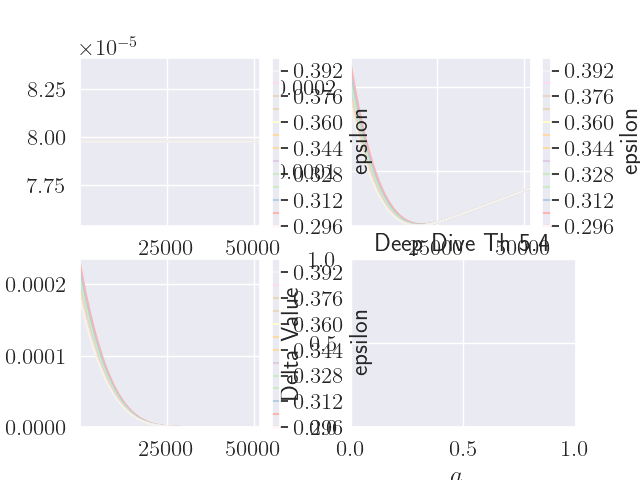

array([[2.34561457e-04, 2.34535899e-04, 2.34510344e-04, ...,
        7.97723708e-05, 7.97739075e-05, 7.97754442e-05],
       [2.18107279e-04, 2.18083259e-04, 2.18059240e-04, ...,
        7.97723708e-05, 7.97739075e-05, 7.97754442e-05],
       [2.06138889e-04, 2.06116056e-04, 2.06093224e-04, ...,
        7.97723708e-05, 7.97739075e-05, 7.97754442e-05],
       ...,
       [1.80317475e-04, 1.80297609e-04, 1.80277745e-04, ...,
        7.97723708e-05, 7.97739075e-05, 7.97754442e-05],
       [1.79314453e-04, 1.79294733e-04, 1.79275014e-04, ...,
        7.97723708e-05, 7.97739075e-05, 7.97754442e-05],
       [1.78635566e-04, 1.78615948e-04, 1.78596333e-04, ...,
        7.97723708e-05, 7.97739075e-05, 7.97754442e-05]])

In [32]:
x_values = range(1, c_u + 1)
X, Y = np.meshgrid(x_values, epsilon_range)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# fig = plt.figure(figsize=(10, 6))

#ax2 = fig.add_subplot()
#CS = ax2.contour(X,all_results_part1,Y, levels=15, cmap="Pastel1")

#ax2 = fig.add_subplot()
CS1 = ax1.contour(X,all_results_part1,Y, levels=15, cmap="Pastel1")
plt.colorbar(CS1, label="epsilon")

CS2 = ax2.contour(X,all_results_part2,Y, levels=15, cmap="Pastel1")
plt.colorbar(CS2, label="epsilon")

CS3 = ax3.contour(X,all_results_part3,Y, levels=15, cmap="Pastel1")
plt.colorbar(CS3, label="epsilon")

#ax4 = fig.add_subplot(projection='3d')
#ax4.plot(projection='3d')
#ax4.plot_surface(X, Y, all_results_part1, cmap="viridis", alpha=0.7)
#ax4.plot_surface(X, Y, all_results_part2, cmap="viridis", alpha=0.7)
#ax4.plot_surface(X, Y, all_results_part3, cmap="viridis", alpha=0.7)

#ax2 = fig.add_subplot()
#CS3 = ax2.contour(X,all_results_part3,Y, levels=15, cmap="Pastel1")
#CS2 = ax2.contour(X,all_results_part2,Y ,levels=15 ,cmap="Accent")
#CS3 = ax2.contour(X,all_results_part3,Y ,levels=15,cmap="Dark2")
#plt.colorbar(CS2, label="epsilon")
#plt.colorbar(CS3, label="epsilon")

#plt.clabel(CS, inline=1, fontsize=10)
#plt.clabel(CS2, inline=1, fontsize=10)
#plt.clabel(CS3, inline=1, fontsize=10)

#plt.plot(x_values, all_deltas[1], epsilon_range, label=f'Delta Part II')
#plt.plot(x_values, all_deltas[2], epsilon_range, label=f'Delta Part III')

plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
plt.ylabel('Delta Value')
plt.title('Deep Dive Th 5.4')

#ax2 = fig.add_subplot()
#CS3 = ax2.contour(X,all_results_part3,Y, levels=15, cmap="Pastel1")
#CS2 = ax2.contour(X,all_results_part2,Y ,levels=15 ,cmap="Accent")
#CS3 = ax2.contour(X,all_results_part3,Y ,levels=15,cmap="Dark2")
#plt.colorbar(CS2, label="epsilon")
#plt.colorbar(CS3, label="epsilon")

#plt.clabel(CS, inline=1, fontsize=10)
#plt.clabel(CS2, inline=1, fontsize=10)
#plt.clabel(CS3, inline=1, fontsize=10)

#plt.plot(x_values, all_deltas[1], epsilon_range, label=f'Delta Part II')
#plt.plot(x_values, all_deltas[2], epsilon_range, label=f'Delta Part III')

plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
plt.ylabel('Delta Value')
plt.title('Deep Dive Th 5.4')

plt.xlabel('$a_=$')
# plt.yscale("symlog", linthresh=1e-15)
# plt.xscale("linear")
plt.ylabel('Delta Value')
plt.title('Deep Dive Th 5.4')
#
plt.show()

all_results_part2

In [ ]:
# Initial Convert due to ChatGPT o4
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def delta_bw(epsilon, mu):
    return norm.cdf(mu / 2 - epsilon / mu) - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)

def tau_diff_func(delta, c_u, sigma):
    return norm.ppf((1 - delta) ** (1 / c_u)) * sigma

# Root Finder for mu
def findrootmu(candidate_mu, epsilon, delta):
    mu = candidate_mu
    for _ in range(100):
        f = delta_bw(epsilon, mu) - delta
        fp = (norm.pdf(mu / 2 - epsilon / mu) * (1 / 2 + epsilon / mu**2) - delta
              - np.exp(epsilon) * norm.pdf(-mu / 2 - epsilon / mu) * (-1 / 2 + epsilon / mu**2))
        mu = mu - f / fp
    return mu

# Root Finder for epsilon
def findroot(candidate_epsilon, mu, delta):
    epsilon = candidate_epsilon
    for _ in range(100):
        f = delta_bw(epsilon, mu) - delta
        fp = (norm.pdf(mu / 2 - epsilon / mu) * (-1 / mu)
              - np.exp(epsilon) * norm.cdf(-mu / 2 - epsilon / mu)
              - np.exp(epsilon) * norm.pdf(-mu / 2 - epsilon / mu) * (-1 / mu))
        epsilon = epsilon - f / fp
    return epsilon

# General Result
def gshm_delta(c_u, sigma, tau_diff, epsilon):
    delta_arr = np.zeros(c_u)
    delta_arr2 = np.zeros(c_u)

    for i in range(1, c_u + 1):
        a_eq = i - 1
        mu = np.sqrt(c_u - a_eq) / sigma
        epsilon2 = epsilon - a_eq * np.log(norm.cdf(tau_diff / sigma))
        f = delta_bw(epsilon2, mu)

        delta_arr[i - 1] = 1 - norm.cdf(tau_diff / sigma)**a_eq + norm.cdf(tau_diff / sigma)**a_eq * f
        epsilon3 = epsilon + a_eq * np.log(norm.cdf(tau_diff / sigma))
        delta_arr2[i - 1] = delta_bw(epsilon3, mu)

    final_delta = max(1 - norm.cdf(tau_diff / sigma)**c_u, max(delta_arr), max(delta_arr2))
    return final_delta

# Parameters
c_u = 51914
eps_views = 0.349
delta = 10**(-5)
k = np.sqrt(c_u)
mu_arr = 0
extra_y = 0

# Create sigma, tau curve
mu = findrootmu(np.sqrt(eps_views), eps_views, delta)
min_sigma = k / mu

mu = np.sqrt(mu**2 + np.sum(np.array(mu_arr)**2))
epsilon = findroot(0.01, mu, delta)

# Sigma values
sigma = np.concatenate((np.arange(0.01, 0.1, 0.01), np.arange(0.1, 300, 0.01)))
tau_diff = np.zeros(len(sigma))
tau_diff_gshm = np.zeros(len(sigma))

for i in range(len(sigma)):
    mu = k / sigma[i]
    mu = np.sqrt(mu**2 + np.sum(np.array(mu_arr)**2))
    delta_prime = delta_bw(epsilon, mu)
    delta_infinite = delta - delta_prime
    tau_diff[i] = tau_diff_func(delta_infinite, c_u, sigma[i])
    tau_diff_gshm[i] = tau_diff_func(delta, c_u, sigma[i])

# Check tau_diff meets target delta for GSHM
# Not sure where this is used.
tau_diff_gshm_check = []
for i in range(0, len(sigma), 500):
    tau_diff_gshm_check.append(abs(gshm_delta(c_u, sigma[i], tau_diff_gshm[i], epsilon) - delta) < delta**2)
accuracy = sum(tau_diff_gshm_check) / len(tau_diff_gshm_check) # not used.

# Plotting Figure A
min_y = min(np.min(tau_diff), np.min(tau_diff_gshm))
max_y = max(np.max(tau_diff), np.max(tau_diff_gshm))

plt.figure(figsize=(10, 6))
plt.plot(sigma, tau_diff, label="Add deltas", linewidth=2)
plt.plot(sigma[::10], tau_diff_gshm[::10], color="blue", linestyle="--", linewidth=2, label="GSHM")
plt.axvline(x=round(min_sigma), color="gray", linestyle=":", label=f"$\sigma = {round(min_sigma)}$")
plt.ylim(min_y, max_y + extra_y)
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\tau^* - \tau$")
plt.legend()
plt.grid(True)
plt.show()

# Parameters for epsilon-delta curves
delta_infinite = 10**(-8)
sigma = np.sqrt(c_u) / mu
eps_max = findroot(0.01, mu, delta_infinite)

# Delta-epsilon values for points on curve
delta_plot_vals = 10**np.arange(-8, -4, 1)
eps_plot_vals = [findroot(0.01, mu, dpv) for dpv in delta_plot_vals]

# Delta curves calculation
delta_arr_add_deltas_plot_vals = []
delta_arr_gshm_plot_vals = []
annotations = []

for eps in eps_plot_vals:
    delta_add = delta_bw(eps, mu) + delta_infinite
    tau_diff = tau_diff_func(delta_infinite, c_u, sigma)
    delta_gshm = gshm_delta(c_u, sigma, tau_diff, eps)
    delta_arr_add_deltas_plot_vals.append(delta_add)
    delta_arr_gshm_plot_vals.append(delta_gshm)
    annotations.append(f"$\delta_{{GSHM}}={round(delta_gshm, -int(np.log10(delta_gshm)))}$")

KeyboardInterrupt: 